In [94]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# load the data into a pandas dataframe
df = pd.read_csv("USearning.csv")

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35066 entries, 0 to 35065
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      35066 non-null  int64  
 1   ID              35066 non-null  int64  
 2   study_a         35066 non-null  int64  
 3   level_w         35066 non-null  object 
 4   in_class        35066 non-null  int64  
 5   high_edu_level  35065 non-null  object 
 6   m_status        35066 non-null  object 
 7   occupation      35066 non-null  object 
 8   family_status   35065 non-null  object 
 9   race_ind        35066 non-null  object 
 10  gender          35066 non-null  object 
 11  cap_g           2972 non-null   float64
 12  cap_l           35064 non-null  float64
 13  ave_hours       35066 non-null  int64  
 14  income          35066 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 4.0+ MB


In [97]:
df.describe()

,Unnamed: 0,ID,study_a,in_class,cap_g,cap_l,ave_hours
count,35066.000000,35066.000000,35066.000000,3.506600e+04,2972.000000,35064.000000,35066.000000
mean,17532.500000,17532.500000,38.700821,1.870174e+05,13003.528937,88.423625,40.499202
std,10122.826606,10122.826606,13.789483,1.051335e+05,22605.243129,404.879832,12.481694
min,0.000000,0.000000,17.000000,1.228500e+04,114.000000,0.000000,1.000000
25%,8766.250000,8766.250000,28.000000,1.154150e+05,3418.000000,0.000000,40.000000
50%,17532.500000,17532.500000,37.000000,1.764930e+05,7298.000000,0.000000,40.000000
75%,26298.750000,26298.750000,48.000000,2.348198e+05,13550.000000,0.000000,45.000000
max,35065.000000,35065.000000,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [98]:
#check null values
print(df.isnull().sum())


Unnamed: 0            0
ID                    0
study_a               0
level_w               0
in_class              0
high_edu_level        1
m_status              0
occupation            0
family_status         1
race_ind              0
gender                0
cap_g             32094
cap_l                 2
ave_hours             0
income                0
dtype: int64


# CLEANSE THE DATA

In [99]:
df.dropna(subset=['high_edu_level'], inplace=True)


In [100]:
df.dropna(subset=['family_status'], inplace=True)


In [101]:
cap_g_mean = df['cap_g'].mean()



In [102]:
df['cap_g'].fillna(cap_g_mean, inplace=True)


In [103]:
# Fill missing values in cap_l with median value
cap_l_median = df['cap_l'].median()
df['cap_l'] = df['cap_l'].fillna(cap_l_median)

In [104]:
# Check for null data again
print(df.isnull().sum())


Unnamed: 0        0
ID                0
study_a           0
level_w           0
in_class          0
high_edu_level    0
m_status          0
occupation        0
family_status     0
race_ind          0
gender            0
cap_g             0
cap_l             0
ave_hours         0
income            0
dtype: int64


# FIND OUTLIERS AND REMOVE THEM

In [105]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Unnamed: 0     17531.50
ID             17531.50
study_a           20.00
in_class      119414.25
cap_g              0.00
cap_l              0.00
ave_hours          5.00
dtype: float64


/var/folders/25/pxv53kq93d96lnjrnj27t8cc0000gn/T/ipykernel_12937/904187463.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/var/folders/25/pxv53kq93d96lnjrnj27t8cc0000gn/T/ipykernel_12937/904187463.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [106]:
# remove outliers for 'in_class' column
df = df[(df['in_class'] > (Q1['in_class'] - 1.5 * IQR['in_class'])) & (df['in_class'] < (Q3['in_class'] + 1.5 * IQR['in_class']))]

In [107]:
# remove outliers for 'ave_hours' column
df = df[(df['ave_hours'] > (Q1['ave_hours'] - 1.5 * IQR['ave_hours'])) & (df['ave_hours'] < (Q3['ave_hours'] + 1.5 * IQR['ave_hours']))]


We didn't remove any outliers for 'cap_g' and 'cap_l' because the IQR for those columns was 0, meaning that all values were the same.

In [108]:
# display the cleaned data
df.head()

,Unnamed: 0,ID,study_a,level_w,in_class,high_edu_level,m_status,occupation,family_status,race_ind,gender,cap_g,cap_l,ave_hours,income
0,0,0,24,Private,283757,Bachelors,Never-married,Adm-clerical,Own-child,White,Male,13006.162908,0.0,39,<=50K
1,1,1,24,Private,194630,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,13006.162908,0.0,35,<=50K
2,2,2,26,Private,229977,9th,Married-civ-spouse,Craft-repair,Husband,White,Male,13006.162908,0.0,35,<=50K
3,3,3,43,Private,179866,Bachelors,Divorced,Sales,Unmarried,White,Female,13006.162908,0.0,40,>50K
5,5,5,63,Private,130968,9th,Divorced,Transport-moving,Not-in-family,White,Male,13006.162908,0.0,50,<=50K


# Who are these people (i.e, exploring the data)

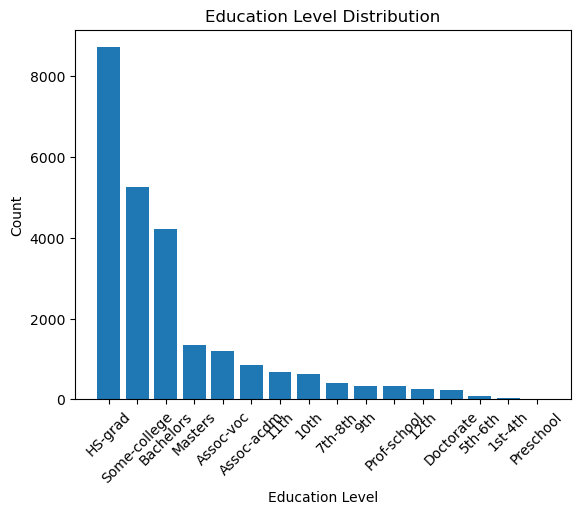

In [109]:
#Bar chart of education levels
edu_counts = df['high_edu_level'].value_counts()

plt.bar(edu_counts.index, edu_counts.values)
plt.xticks(rotation=45)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


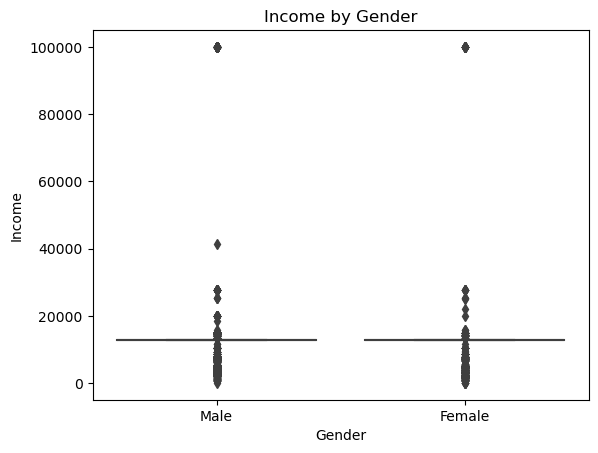

In [110]:
#Box plot of income by gender

sns.boxplot(x='gender', y='cap_g', data=df)
plt.title("Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.show()


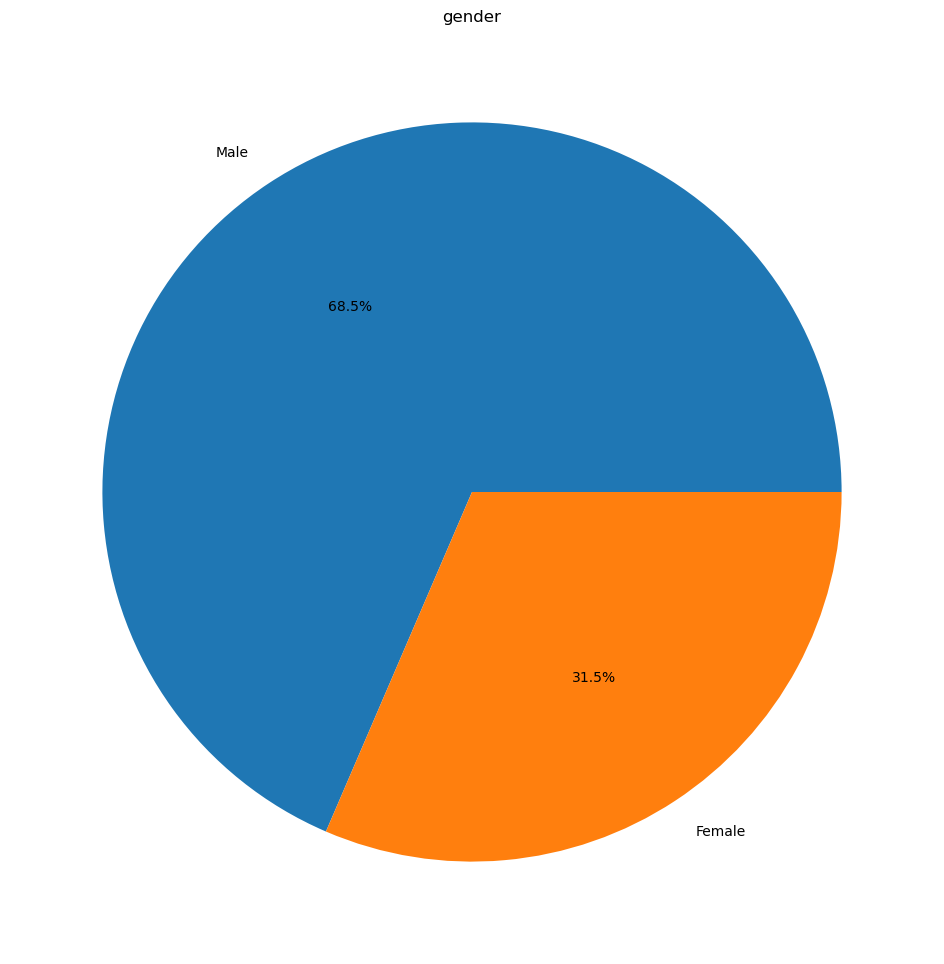

In [111]:
#create a pie chart visualization of the distribution of gender in a DataFrame
gender_counts = df['gender'].value_counts()
fig = plt.figure(figsize= (14,12))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('gender')
plt.show()



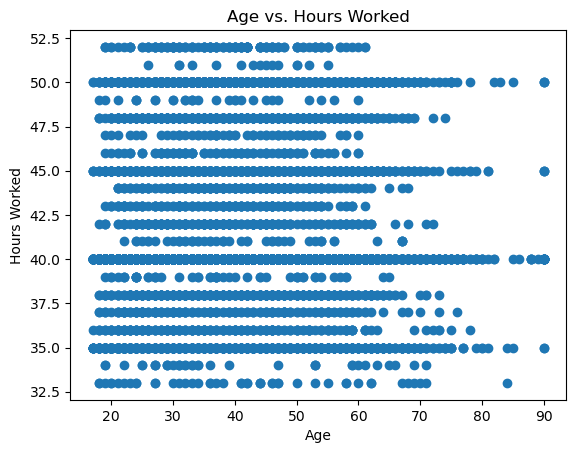

In [112]:
#Scatter plot of age and hours worked
plt.scatter(df['study_a'], df['ave_hours'])
plt.title("Age vs. Hours Worked")
plt.xlabel("Age")
plt.ylabel("Hours Worked")
plt.show()


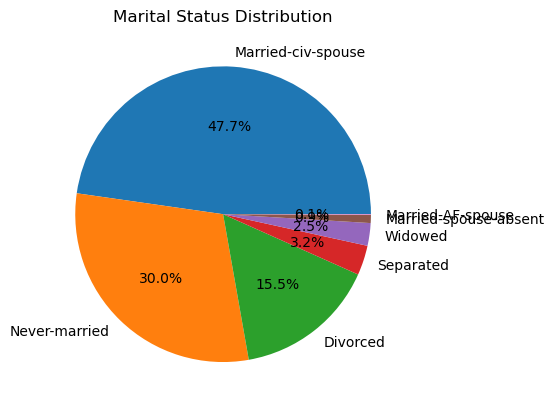

In [113]:
#Pie chart of marital status

marital_counts = df['m_status'].value_counts()

plt.pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
plt.title("Marital Status Distribution")
plt.show()


In [114]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'study_a', 'level_w', 'in_class', 'high_edu_level',
       'm_status', 'occupation', 'family_status', 'race_ind', 'gender',
       'cap_g', 'cap_l', 'ave_hours', 'income'],
      dtype='object')


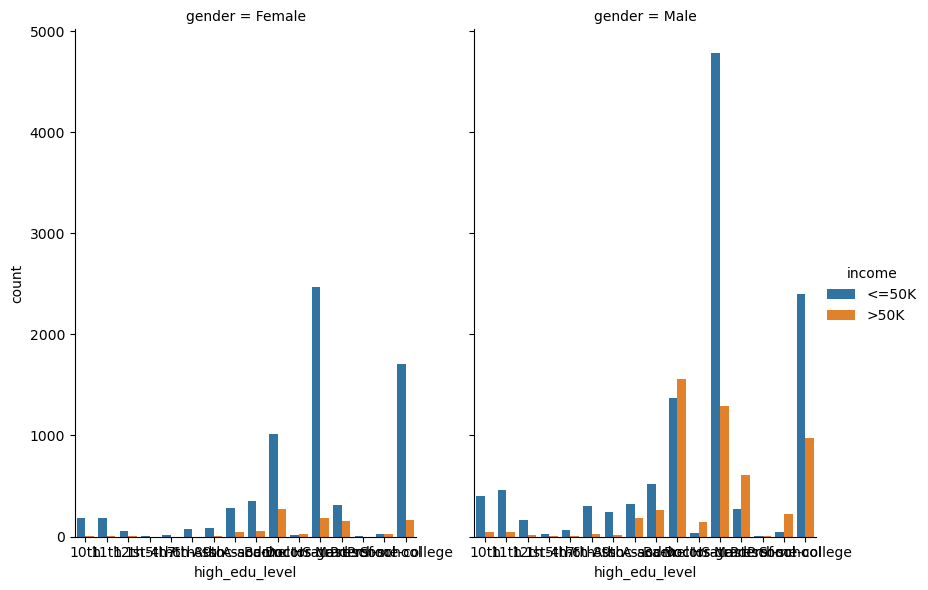

In [115]:

# group the data by education level and gender, and calculate the count of income levels for each group
grouped_data = df.groupby(['high_edu_level', 'gender'])['income'].value_counts().reset_index(name='count')

# create a bar plot using seaborn
sns.catplot(x='high_edu_level', y='count', hue='income', col='gender', data=grouped_data, kind='bar', height=6, aspect=.7)


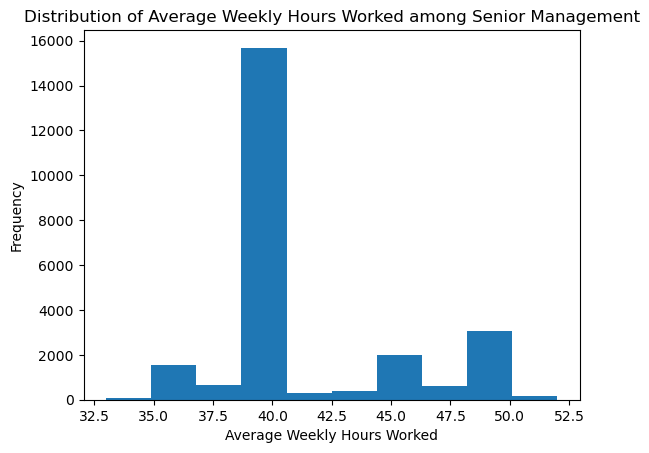

In [116]:
# create a histogram of average weekly hours worked, with 10 bins
plt.hist(df['ave_hours'], bins=10)
plt.xlabel('Average Weekly Hours Worked')
plt.ylabel('Frequency')
plt.title('Distribution of Average Weekly Hours Worked among Senior Management')
plt.show()

# Who are most likely to get placed?

In [123]:
# Create a new column to indicate whether the income is over 50k or not
df['income_over_50k'] = df['income'].apply(lambda x: x == '>50K')

In [124]:
# Group the data by occupation and calculate the percentage of individuals with income over 50k in each group
grouped = df.groupby('occupation')['income_over_50k'].mean() * 100

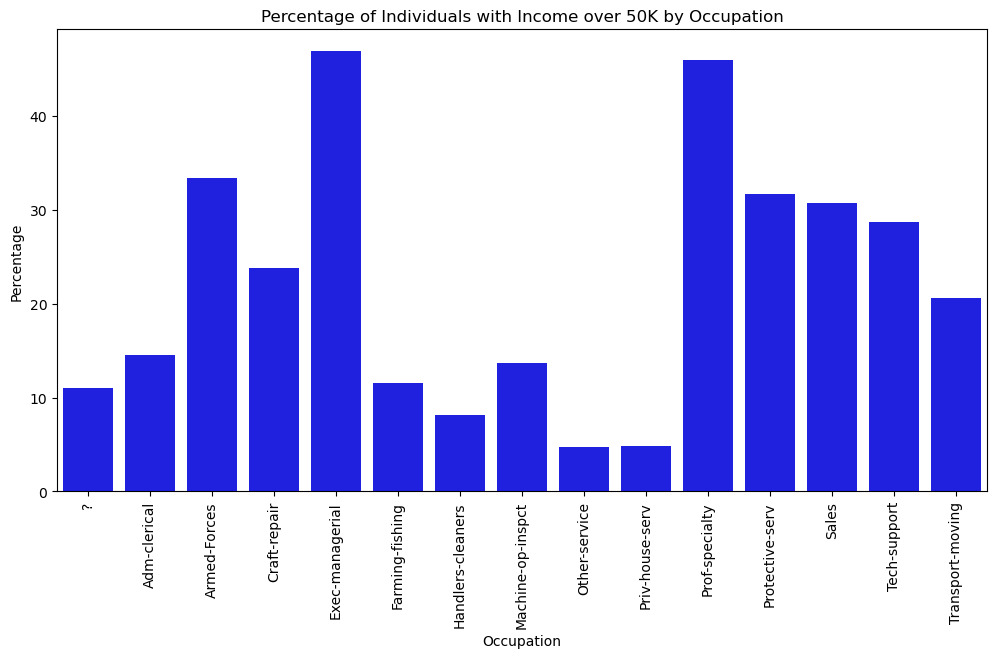

In [125]:
# Create a bar plot to show the percentage of individuals with income over 50k by occupation
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped.index, y=grouped.values, color='blue')
plt.title('Percentage of Individuals with Income over 50K by Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

In [126]:
#create a count plot to show the proportion of high-income individuals by gender
sns.countplot(x='gender', data = high_income)
plt.title('Proportion of High-Income Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


NameError: name 'high_income' is not defined

In [121]:
#create a bar plot to show the average work hours by occupation
high_income['hours_per_week_bins'] = pd.cut(high_income['ave_hours'], bins=[0, 20, 40, 60, 80, 100])
sns.barplot(x='hours_per_week_bins', y='ave_hours', hue='occupation', data=high_income)
plt.title('Average Work Hours by Occupation')
plt.xlabel('Hours per Week')
plt.ylabel('Occupation')
plt.show()


NameError: name 'high_income' is not defined

In [122]:
# Create scatterplot of age vs. education level, colored by occupation
sns.scatterplot(x='level_w', y='high_edu_level', hue='occupation', data=high_income)
plt.title('Education Level and Occupation by Level of Education')
plt.xlabel('Level of Education')
plt.ylabel('Highest Education Level Completed')
plt.show()

NameError: name 'high_income' is not defined

In [83]:
#create a scatter plot to show the education level and occupation by age
plt.figure(figsize=(12, 6))
sns.histplot(x='high_edu_level', data=high_income, bins=10)
plt.title('Education Level Distribution for Individuals with Salaries over 50k')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


NameError: name 'high_income' is not defined

<Figure size 1200x600 with 0 Axes>

# Prepare the data for a regression analysis

In [84]:
df_encoded = pd.get_dummies(df, columns=['occupation', 'm_status', 'family_status', 'race_ind', 'gender'])


In [85]:
df

,Unnamed: 0,ID,study_a,level_w,in_class,high_edu_level,m_status,occupation,family_status,race_ind,gender,cap_g,cap_l,ave_hours,income,income_over_50k
0,0,0,24,Private,283757,Bachelors,Never-married,Adm-clerical,Own-child,White,Male,13006.162908,0.0,39,<=50K,False
1,1,1,24,Private,194630,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,13006.162908,0.0,35,<=50K,False
2,2,2,26,Private,229977,9th,Married-civ-spouse,Craft-repair,Husband,White,Male,13006.162908,0.0,35,<=50K,False
3,3,3,43,Private,179866,Bachelors,Divorced,Sales,Unmarried,White,Female,13006.162908,0.0,40,>50K,True
5,5,5,63,Private,130968,9th,Divorced,Transport-moving,Not-in-family,White,Male,13006.162908,0.0,50,<=50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,35060,35060,37,Local-gov,108320,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,13006.162908,0.0,45,>50K,True
35062,35062,35062,25,Private,149486,HS-grad,Never-married,Machine-op-inspct,Unmarried,Black,Male,13006.162908,0.0,40,<=50K,False
35063,35063,35063,53,Private,177705,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,13006.162908,0.0,44,>50K,True
35064,35064,35064,39,Federal-gov,206190,HS-grad,Never-married,Exec-managerial,Unmarried,White,Female,13006.162908,0.0,45,<=50K,False


In [131]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Run the regression analysis

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix

In [133]:
# create dummy variables for categorical variables
X = pd.get_dummies(data[['level_w', 'in_class', 'high_edu_level', 'cap_g', 'cap_l', 'ave_hours', 'income', 'm_status', 'occupation', 'family_status', 'race_ind', 'gender']])
# define the target variable
y = dat['income']

NameError: name 'data' is not defined

In [89]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Create a pipeline that first fills in missing values and then fits a decision tree classifier
pipe = make_pipeline(SimpleImputer(strategy='mean'), DecisionTreeClassifier(random_state=42))

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)


NameError: name 'DecisionTreeClassifier' is not defined

In [91]:
# Make predictions on the test data using the fitted pipeline
y_pred = pipe.predict(X_test)


NameError: name 'pipe' is not defined

In [129]:
# Calculate the accuracy score as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy score as a percentage
print(f"Test Accuracy: {accuracy:.2f}%")


NameError: name 'accuracy_score' is not defined